# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_A########.ipynb' (filled in with your student ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted. 
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

## Part 1 - Data Wrangling

You are provided with two data files:
- age_steps.csv
- name_income_id.json

In [1]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.
csvfile = 'age_steps.csv'
df_steps = pd.read_csv(csvfile)

In [3]:
assert isinstance(df_steps, pd.DataFrame)


In [4]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.
jsonfile = 'name_income_id.json'
df_income = pd.read_json(jsonfile)

In [5]:
assert isinstance(df_income, pd.DataFrame)


In [6]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.
df_income = df_income.drop(['first_name', 'last_name'], axis=1)

In [7]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [8]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Note: For this part, it doesn't matter in which order you merge the dataframes.

df = pd.merge(df_steps, df_income, on='id')

In [9]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [10]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]
df = df[['id','age','steps','income']]

In [11]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

## Part 2 - Data Cleaning

In [12]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'

n_nan = np.count_nonzero(np.isnan(df)['income'])

In [13]:
assert(n_nan)

In [14]:
# 2b) Remove all rows from df that have missing data (that have NaN values)

df = df.dropna()

In [15]:
assert(sum(np.isnan(df['income'])) == 0)

# Data Visualization

- You will be making histograms, check out this example on how to do that.
    - http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
    - This example has more than you need: 
        - Titles, axis labels, etc are optional (but recommended)
        - You do no need to add a 'best fit' line.
- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

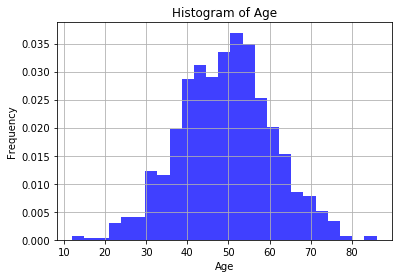

In [16]:
# 2c) Plot the histogram of the age variable
f1 = plt.hist(df['age'], 25, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
f1 = plt.gcf()

In [17]:
assert f1.gca().has_data()

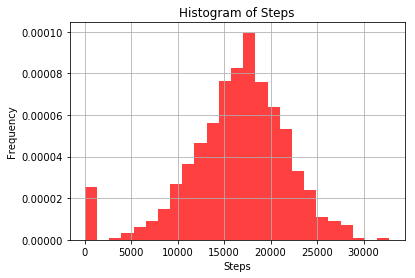

In [18]:
# 2d) Plot the histogram of the steps variable
f2 = plt.hist(df['steps'], 25, normed=1, facecolor='red', alpha=0.75)
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Steps')
plt.grid(True)
f2 = plt.gcf()

In [19]:
assert f2.gca().has_data()

### M1 - What do you notice about steps data from the plot?

There appears to be a number of data points of step values <= 0

In [20]:
# 2e) Check how many -1 values there are in steps. Save the number into a variable called 'n_neg'
temp = df['steps'] == -1
n_neg = temp.sum()

In [21]:
assert(n_neg)

In [22]:
# 2f) Remove all rows where steps is equal to -1
df = df.drop(df[df.steps == -1].index)
assert sum(df['steps'].isin([-1])) == 0

In [23]:
assert -1 not in df['steps']

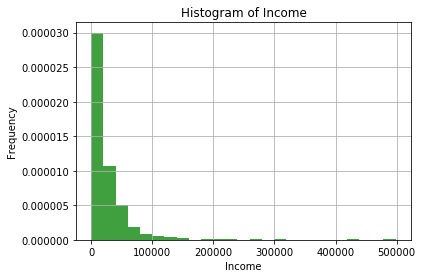

In [24]:
# 2g) Plot the histogram of the income variable
f3 = plt.hist(df['income'], 25, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.grid(True)
f3 = plt.gcf()

In [25]:
assert f3.gca().has_data()

### M2 - What do you notice about the income data from the plot?

There appear to be values of zero, and there are too many outliers strewn far apart from the rest of the data

In [26]:
# 2h) For all rows in which income is equal to zero, recode income to be equal to 1
df.loc[df['income'] == 0, 'income'] = 1

In [27]:
assert sum(df['income'] == 0.) == 0

In [28]:
# 2i) Transform income using a log10 transform
df['income'] = np.log10(df['income'])

In [29]:
assert np.isclose(min(df['income']), 0.0, 0.1)
assert np.isclose(max(df['income']), 5.69, 0.1)

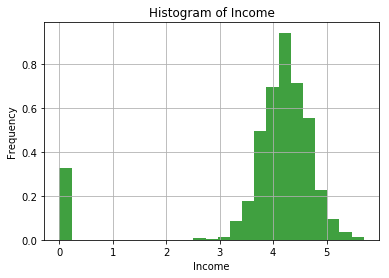

In [30]:
# 2j) Replot the histogram for income data after the data transformation
f4 = plt.hist(df['income'], 25, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.grid(True)
df = df[df['income'] > 0]
f4 = plt.gcf()

In [31]:
assert f4.gca().has_data()

### M3 - What do you notice about the income data after you replot it?

The income axis is no longer in terms of thousands since we used log_10 to transform the data, and the frequency has changed, too

In [32]:
# 2k) Remove all rows where age is less than 18
df = df[df['age'] >= 18]

In [33]:
assert min(df['age']) >= 18

### Removing outliers
Next, we're going to remove all rows where the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

In [34]:
# 2l) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

std = df['steps'].std()
std3 = std * 3
mean = df['steps'].mean()
std_max = mean + std3
std_min = mean - std3

In [35]:
assert(std3)
assert(std_min)
assert(std_max)


In [36]:
# 2m) Now use these values to remove any rows with steps data above or below these thresholds

df = df.drop(df[df.steps > std_max].index)
df = df.drop(df[df.steps < std_min].index)

In [37]:
assert min(df['steps']) > 3446
assert max(df['steps']) < 30594

In [38]:
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (879, 4)

## Part 3 - Basic Analyses

In [39]:
# 3a) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas function. Keep all columns (including ID).

corrs = df.corr('pearson')

In [40]:
assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

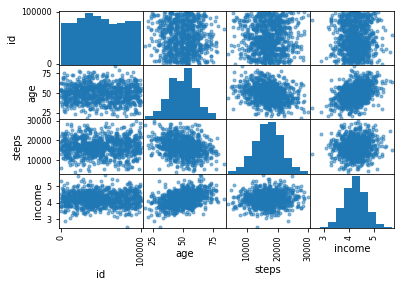

In [41]:
# 3b) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
fd = pd.scatter_matrix(df)

In [42]:
fd[0][0].axes.has_data()

True

# Part 4 - Predictions

Notes:
- Use the polyfit function from np, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions should be in dollars (so you'll have to 'un-log' the prediction)

In [53]:
# 4a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'
a1, b1 = np.polyfit(df.age, df.income, 1)

In [54]:
assert(a1)
assert(b1)


In [55]:
# 4b) Use the model parameters from 4a to predict the income of a 75 year old. Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
pred1 = np.power(10, a1*(75) + b1)

In [56]:
assert(pred1)


In [57]:
# 4c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'
a2, b2 = np.polyfit(df.steps, df.income, 1)

In [58]:
assert(a2)
assert(b2)


In [59]:
# 4d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
pred2 = np.power(10, a2*(20000) + b2)

In [60]:
assert(pred2)


In [61]:
# 4e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.
better_model = 'age'

In [62]:
assert better_model

### M4 - Why do you think (whichever model you answered) is better?

Someone's step count should not affect their income, and both age and income change by the year, while step counts vary every day. In fact, since the time scale difference between years (for income) and days (for steps) is too great, the comparison is irrelevant.

## Done! Upload this notebook to TritonED